In [21]:
pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 6.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=3abd1fc6083bebe8e6d8fbfc2de5923e0df2b591bbab64aa1155f8fc15c0d868
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [16]:
n_products = 1000
data = pd.DataFrame({
       'time_to_failure': np.random.exponential(scale=365, size=n_products),  # Simulated time until failure in days
       'censored': np.random.binomial(1, 0.8, size=n_products),  # 1: observed, 0: censored
       'feature_1': np.random.normal(loc=50, scale=10, size=n_products),  # Random feature
       'feature_2': np.random.normal(loc=30, scale=5, size=n_products)   # Another random feature
   })

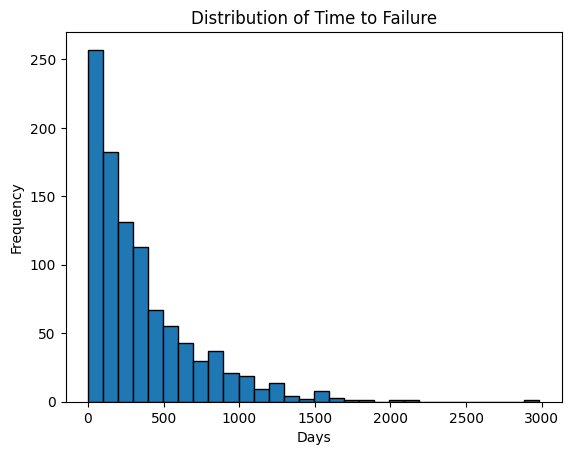

In [18]:
plt.hist(data['time_to_failure'], bins=30, edgecolor='k')
plt.title('Distribution of Time to Failure')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

In [19]:
print(data['censored'].value_counts(normalize=True))

censored
1    0.796
0    0.204
Name: proportion, dtype: float64


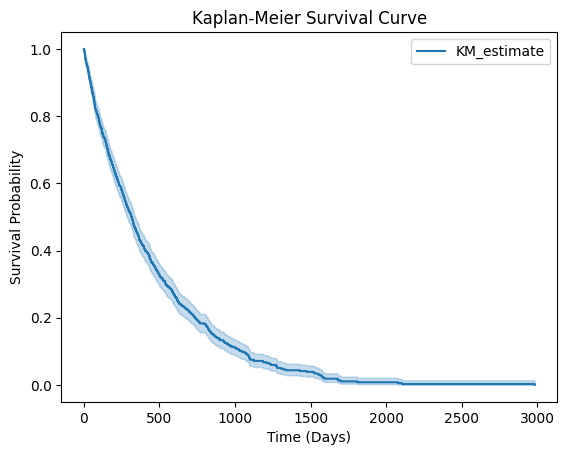

In [22]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
kmf.fit(data['time_to_failure'], event_observed=data['censored'])

kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Probability')
plt.show()

<lifelines.CoxPHFitter: fitted with 1000 total observations, 204 right-censored observations>
             duration col = 'time_to_failure'
                event col = 'censored'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 796
   partial log-likelihood = -4692.17
         time fit was run = 2024-12-05 12:27:35 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
feature_1  0.00      1.00      0.00           -0.00            0.01                1.00                1.01
feature_2  0.01      1.01      0.01           -0.00            0.02                1.00                1.02

           cmp to    z    p  -log2(p)
covariate                            
feature_1    0.00 1.01 0.31      1.68
feature_2    0.00 1.34 0.18      2.48
---
Concordance = 0.51
Partial AIC = 9388.34
log-likelihood ratio test = 2.89 on 2 df
-log2(p) of ll-ratio test = 2.09

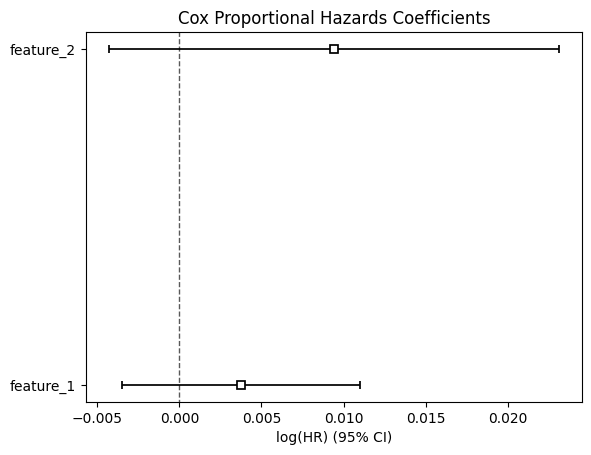

In [23]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(data, duration_col='time_to_failure', event_col='censored')
cph.print_summary()

cph.plot()
plt.title('Cox Proportional Hazards Coefficients')
plt.show()